In [1]:
from preprocess import Preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from evaluation import plot_confusion_matrix, plot_feature_importance, plot_parameter_sensitivity, get_results, get_cross_validation_scores
from scipy.stats import randint, loguniform
import pandas as pd
import matplotlib.pylab as plt

              precision    recall  f1-score   support

   False (0)       0.97      0.94      0.96        35
    True (1)       0.91      0.95      0.93        22

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



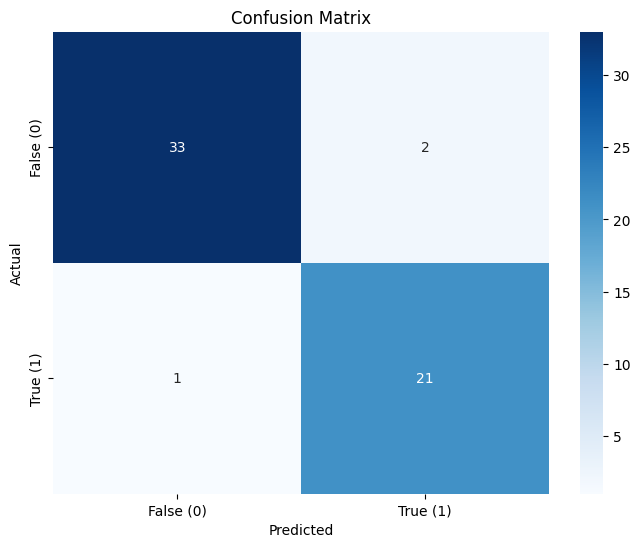

In [2]:
# Create train and test split
pp = Preprocessing()
df = pp.load_data()
# Set ridge to true, so the labels are mapped correctly
X_train, X_test, y_train, y_test = pp.preprocess_data(df, ridge=True)

# Get feature and target names
temp_df = df.drop(['ID', 'class'], axis=1)
feature_names = temp_df.columns.tolist()
target_names = ['False (0)', 'True (1)']

ridge_model = RidgeClassifier(class_weight= 'balanced',random_state=42)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

get_results(y_test, y_pred_ridge, target_names)

In [3]:
get_cross_validation_scores(ridge_model, X_train, y_train )

10-Fold CV Scores: [0.91304348 0.95577373 1.         0.95686075 0.95599259 0.95599259
 0.95599259 0.8121118  0.953814   0.9550406 ]
Average f1_weighted Score: 0.9415
Standard Deviation: 0.0473


In [4]:
# Parameters to optimize
param_distributions = {
    'alpha': loguniform(1e-3, 1),
}


random_search = RandomizedSearchCV(
    estimator=ridge_model,
    param_distributions=param_distributions,
    n_iter=50,  
    cv=5,     
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Best F1-score: {random_search.best_score_:.4f}")

final_model = random_search.best_estimator_

Best parameters found: {'alpha': np.float64(0.013292918943162165)}
Best F1-score: 0.9464


              precision    recall  f1-score   support

   False (0)       0.97      0.94      0.96        35
    True (1)       0.91      0.95      0.93        22

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



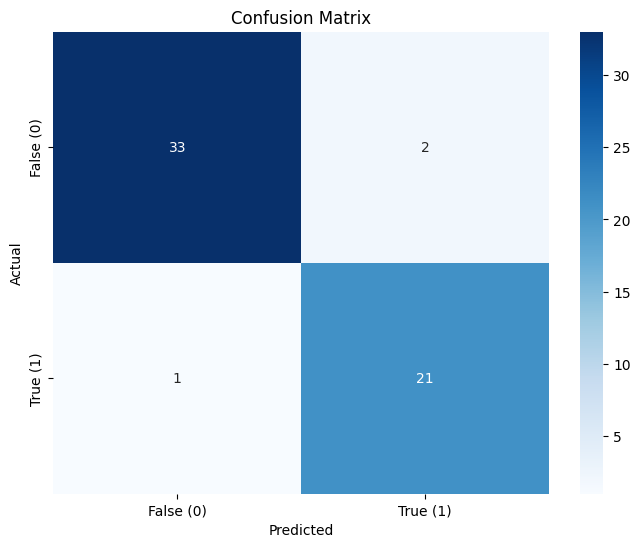

In [5]:
y_pred_ridge_opt = final_model.predict(X_test)
get_results(y_test, y_pred_ridge_opt, target_names)

In [6]:
'''
df_test = pd.read_csv('data/breast-cancer-diagnostic.shuf.tes.csv')
df_test.columns = df_test.columns.str.strip()
# Removing columns that cause multicollinearitys
df_test = df_test.drop(columns=['perimeterMean', 'areaMean', 'perimeterWorst', 'areaWorst', 'perimeterStdErr', 'areaStdErr', 'concavePointsMean', 'textureWorst', 'radiusMean'], axis = 1)
ids = df_test['ID']
X = df_test.drop(['ID'], axis=1)
X = pp.scaler.transform(X)
preds = final_model.predict(X)
df_result = pd.DataFrame()
df_result['ID'] = ids
df_result['class'] = preds
df_result['class'] = df_result['class'].map({-1: 'false', 1: 'true'})
df_result.head()
df_result.to_csv('preds_scaling.csv', index=False)
'''


"\ndf_test = pd.read_csv('data/breast-cancer-diagnostic.shuf.tes.csv')\ndf_test.columns = df_test.columns.str.strip()\n# Removing columns that cause multicollinearitys\ndf_test = df_test.drop(columns=['perimeterMean', 'areaMean', 'perimeterWorst', 'areaWorst', 'perimeterStdErr', 'areaStdErr', 'concavePointsMean', 'textureWorst', 'radiusMean'], axis = 1)\nids = df_test['ID']\nX = df_test.drop(['ID'], axis=1)\nX = pp.scaler.transform(X)\npreds = final_model.predict(X)\ndf_result = pd.DataFrame()\ndf_result['ID'] = ids\ndf_result['class'] = preds\ndf_result['class'] = df_result['class'].map({-1: 'false', 1: 'true'})\ndf_result.head()\ndf_result.to_csv('preds_scaling.csv', index=False)\n"

## Unscaled data

              precision    recall  f1-score   support

   False (0)       0.97      0.94      0.96        35
    True (1)       0.91      0.95      0.93        22

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



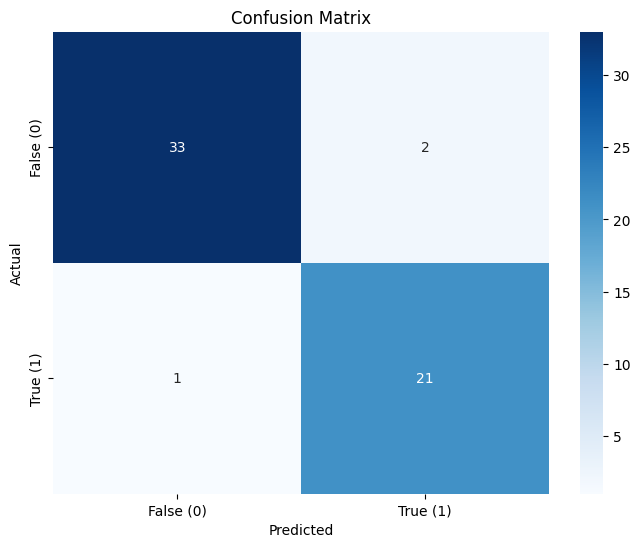

In [7]:
# Create train and test split
pp = Preprocessing()
df = pp.load_data()
X_train, X_test, y_train, y_test = pp.preprocess_data(df, ridge=True, scale=False)

# Get feature and target names
temp_df = df.drop(['ID', 'class'], axis=1)
feature_names = temp_df.columns.tolist()
target_names = ['False (0)', 'True (1)']

ridge_model = RidgeClassifier(class_weight='balanced',random_state=42)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

get_results(y_test, y_pred_ridge, target_names)

In [8]:
# Parameters to optimize
param_distributions = {
    'alpha': loguniform(1e-3, 1),
    
    #'fit_intercept': [True, False]
}


random_search = RandomizedSearchCV(
    estimator=ridge_model,
    param_distributions=param_distributions,
    n_iter=50,  
    cv=5,     
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Best F1-score: {random_search.best_score_:.4f}")

final_model = random_search.best_estimator_

Best parameters found: {'alpha': np.float64(0.7886714129990487)}
Best F1-score: 0.9554


              precision    recall  f1-score   support

   False (0)       0.97      0.94      0.96        35
    True (1)       0.91      0.95      0.93        22

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



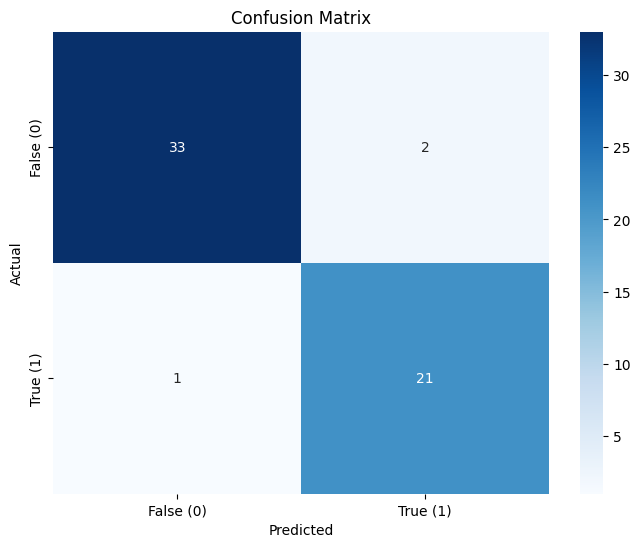

In [9]:
y_pred_ridge_opt = final_model.predict(X_test)
get_results(y_test, y_pred_ridge_opt, target_names)

In [10]:
'''
df_test = pd.read_csv('data/breast-cancer-diagnostic.shuf.tes.csv')
df_test.head()
df_test.columns = df_test.columns.str.strip()
# Removing columns that cause multicollinearitys
df_test = df_test.drop(columns=['perimeterMean', 'areaMean', 'perimeterWorst', 'areaWorst', 'perimeterStdErr', 'areaStdErr', 'concavePointsMean', 'textureWorst', 'radiusMean'], axis = 1)
ids = df_test['ID']
X = df_test.drop(['ID'], axis=1)
preds = final_model.predict(X)

df_result = pd.DataFrame()
df_result['ID'] = ids
df_result['class'] = preds
df_result['class'] = df_result['class'].map({-1: 'false', 1: 'true'})
df_result.head()
df_result.to_csv('preds_noscaling.csv', index=False)
'''

"\ndf_test = pd.read_csv('data/breast-cancer-diagnostic.shuf.tes.csv')\ndf_test.head()\ndf_test.columns = df_test.columns.str.strip()\n# Removing columns that cause multicollinearitys\ndf_test = df_test.drop(columns=['perimeterMean', 'areaMean', 'perimeterWorst', 'areaWorst', 'perimeterStdErr', 'areaStdErr', 'concavePointsMean', 'textureWorst', 'radiusMean'], axis = 1)\nids = df_test['ID']\nX = df_test.drop(['ID'], axis=1)\npreds = final_model.predict(X)\n\ndf_result = pd.DataFrame()\ndf_result['ID'] = ids\ndf_result['class'] = preds\ndf_result['class'] = df_result['class'].map({-1: 'false', 1: 'true'})\ndf_result.head()\ndf_result.to_csv('preds_noscaling.csv', index=False)\n"